<a href="https://colab.research.google.com/github/parthw04/Task--05-Online-Retail-Data-Analysis/blob/main/Task_5_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [6]:
df = pd.read_excel('Online Retail.xlsx')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df = df.dropna(subset=['CustomerID'])

df = df[df['Quantity'] > 0]

df = df[df['UnitPrice'] > 0]

In [8]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [9]:
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

print(sales_by_country)

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

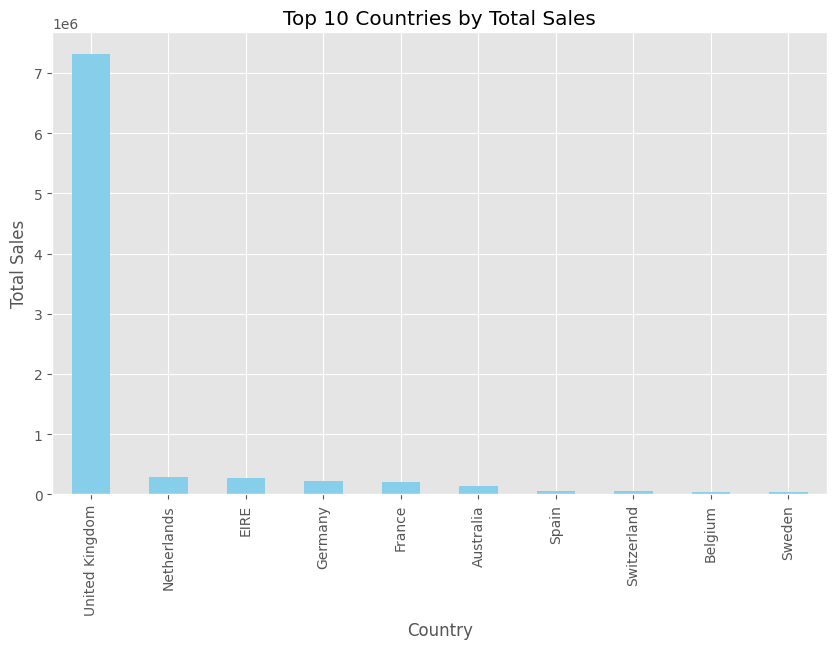

In [10]:
top_countries = sales_by_country.head(10)

top_countries.plot(kind='bar', figsize=(10, 6), color= 'skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Countries by Total Sales')
plt.show()

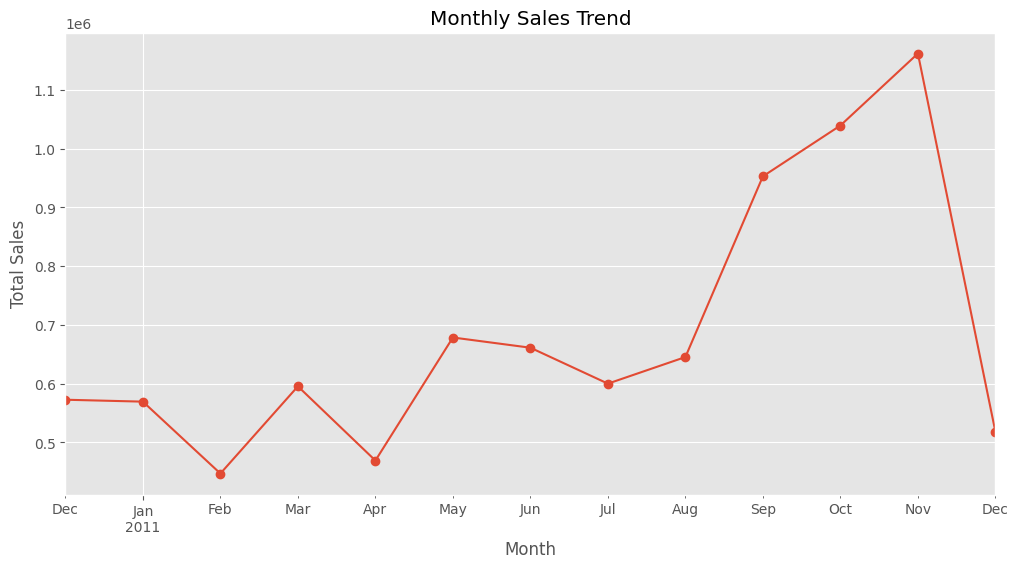

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()

monthly_sales.plot(kind='line', figsize=(12, 6), marker ='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()


In [12]:
print("Top Country by Sales:", sales_by_country.idxmax())
print("Top Month by Sales:", monthly_sales.idxmax())
print("Total Revenue:", df['TotalSales'].sum())


Top Country by Sales: United Kingdom
Top Month by Sales: 2011-11
Total Revenue: 8911407.904
